In [133]:
import pandas as pd
df=pd.read_csv('../data/raw/youtube_bulk_raw.csv')

In [134]:
df.head()

,video_id,category,author,text,likes,published_at
0,4wZwXhoxRIA,technology,@justicebuys1,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z
1,4wZwXhoxRIA,technology,@jacklynkateisrael2568,😮😮,0,2025-09-11T09:52:55Z
2,4wZwXhoxRIA,technology,@kevinjessica6389,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z
3,4wZwXhoxRIA,technology,@FrancescaWhite-y6y,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z
4,4wZwXhoxRIA,technology,@lucasgamingchannel-vm7pg,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z


In [135]:
df.isnull().sum()

video_id         0
category         0
author          10
text            22
likes            0
published_at     0
dtype: int64

In [136]:
df.shape

(76693, 6)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76693 entries, 0 to 76692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      76693 non-null  object
 1   category      76693 non-null  object
 2   author        76683 non-null  object
 3   text          76671 non-null  object
 4   likes         76693 non-null  int64 
 5   published_at  76693 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.5+ MB


In [138]:
df.drop(columns='author',inplace=True)

In [139]:
df['text'] = df['text'].astype(str)


In [140]:
df['text'] = df['text'].astype(str)
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
before = len(df)
df = df.drop_duplicates(subset=['video_id','text'], keep='first').reset_index(drop=True)
print("Dropped duplicates:", before - len(df))


Dropped duplicates: 19896


In [141]:
# 1. Count blanks
blank_count = (df['text'].str.strip() == "").sum()
print("Blank comments:", blank_count)

# 2. Count duplicates
dup_count = df.duplicated(subset=['video_id','text']).sum()
print("Duplicate comments:", dup_count)

# 3. Show some examples of duplicates
dupes = df[df.duplicated(subset=['video_id','text'], keep=False)]
dupes.head(10)


Blank comments: 0
Duplicate comments: 0


,video_id,category,text,likes,published_at


In [142]:
df.shape

(56797, 5)

In [143]:
df.head()

,video_id,category,text,likes,published_at
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z
1,4wZwXhoxRIA,technology,😮😮,0,2025-09-11T09:52:55Z
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z


In [144]:
!pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
import re, html, emoji

url_re = re.compile(r'https?://\S+|www\.\S+')
mention_re = re.compile(r'@\w+')
html_tag_re = re.compile(r'<.*?>')
multispace_re = re.compile(r'\s+')

def clean_text(text, remove_emojis=False):
    s = "" if pd.isna(text) else str(text)
    s = html.unescape(s)
    s = url_re.sub(' ', s)
    s = mention_re.sub(' ', s)
    s = html_tag_re.sub(' ', s)
    if remove_emojis:
        try:
            s = emoji.replace_emoji(s, replace='')
        except Exception:
            s = s.encode('ascii', errors='ignore').decode()
    s = s.lower().strip()
    s = multispace_re.sub(' ', s)
    return s

df['text_clean'] = df['text'].apply(lambda x: clean_text(x, remove_emojis=False))
df[['text','text_clean']].head()


,text,text_clean
0,All products can be found on www.justicebuys.c...,all products can be found on 🙌🏼 since i review...
1,😮😮,😮😮
2,Bro “how to talk to woman in 6 steps” is so re...,bro “how to talk to woman in 6 steps” is so re...
3,I was gonna say does it give you the drinks fo...,i was gonna say does it give you the drinks fo...
4,Anyone gonna talk abt what was o. His pc,anyone gonna talk abt what was o. his pc


In [146]:
df[(df['text_clean'].str.strip() == '')]

,video_id,category,text,likes,published_at,text_clean
232,4wZwXhoxRIA,technology,https://youtube.com/@isha-learn?si=beDQvLlqLI4...,0,2025-05-19T09:04:49Z,
469,4wZwXhoxRIA,technology,@a2d,0,2025-05-01T07:07:46Z,
643,4wZwXhoxRIA,technology,@hopescope,0,2025-03-10T03:08:56Z,
3819,ZggspAgMsyE,gaming,https://youtu.be/gaQN_xoYPtc?sub_confirmation=1,0,2025-09-02T09:34:58Z,
3820,ZggspAgMsyE,gaming,https://www.youtube.com/live/e9_kRQPkryo?si=Ty...,0,2025-09-01T12:17:50Z,
...,...,...,...,...,...,...
52617,sUf2PtEZris,music,https://youtube.com/shorts/xGK0SThe9Kk?si=CcUF...,2,2025-05-03T06:26:12Z,
53646,sUf2PtEZris,music,https://youtube.com/shorts/2iqLFQY7xaQ?si=GUfg...,1,2025-04-24T09:03:52Z,
53670,sUf2PtEZris,music,https://youtu.be/IVNYqQWjbmM?si=DlCRtfpH-1t2Vxek,1,2025-04-24T04:59:47Z,
53713,sUf2PtEZris,music,https://youtube.com/shorts/Tbuet2MGwpk?si=w5od...,0,2025-04-23T21:32:18Z,


In [147]:
df.shape

(56797, 6)

In [148]:
df = df[~(df['text_clean'].str.strip() == '')]

In [149]:
df.sample(10)

,video_id,category,text,likes,published_at,text_clean
27379,sUf2PtEZris,music,Most irritating song,0,2025-07-11T07:54:59Z,most irritating song
51545,sUf2PtEZris,music,Marathi singer better than badshah ❤,4,2025-05-10T14:38:58Z,marathi singer better than badshah ❤
27412,sUf2PtEZris,music,Best best 1:50 ❤❤,0,2025-07-11T06:11:16Z,best best 1:50 ❤❤
31144,sUf2PtEZris,music,Shitty song,0,2025-07-01T18:26:34Z,shitty song
21970,sUf2PtEZris,music,Rile vale,0,2025-07-25T09:06:07Z,rile vale
9269,GJZAcj4P99g,music,50.00 👌,0,2025-09-02T05:21:36Z,50.00 👌
12294,sUf2PtEZris,music,nice videos,1,2025-09-06T11:54:41Z,nice videos
1441,4wZwXhoxRIA,technology,“How to talk to women in 6 steps” what is the ...,0,2025-01-07T23:20:03Z,“how to talk to women in 6 steps” what is the ...
19137,sUf2PtEZris,music,MoMobisst poksongbaba,0,2025-08-04T04:25:49Z,momobisst poksongbaba
43692,sUf2PtEZris,music,8 th June 2025 ?? Anyone,1,2025-06-08T05:05:19Z,8 th june 2025 ?? anyone


In [150]:
df[df['text_clean'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,video_id,category,text,likes,published_at,text_clean


In [151]:
df.head()

,video_id,category,text,likes,published_at,text_clean
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all products can be found on 🙌🏼 since i review...
1,4wZwXhoxRIA,technology,😮😮,0,2025-09-11T09:52:55Z,😮😮
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro “how to talk to woman in 6 steps” is so re...
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i was gonna say does it give you the drinks fo...
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what was o. his pc


In [152]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['text_clean'] = df['text_clean'].str.strip()

In [153]:
df.shape

(56255, 6)

In [154]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment on cleaned text
df['sentiment'] = df['text_clean'].apply(get_sentiment)

# Check results
print(df[['text_clean', 'sentiment']].head(10))
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


                                          text_clean sentiment
0  all products can be found on 🙌🏼 since i review...  positive
1                                                 😮😮   neutral
2  bro “how to talk to woman in 6 steps” is so re...   neutral
3  i was gonna say does it give you the drinks fo...  positive
4           anyone gonna talk abt what was o. his pc   neutral
5  how is everyone not talking about his search?!...  positive
6               when tech goes from wow to how?! 😳👉🧠  positive
7                        this is why l love this guy  positive
8                                    i have number 8  positive
9  imagine using that flashlight 🔦 in the middle ...  positive

Sentiment distribution:
sentiment
positive    34606
neutral     16637
negative     5012
Name: count, dtype: int64


In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment on cleaned text
df['sentiment'] = df['text_clean'].apply(get_sentiment)

# Check results
print(df[['text_clean', 'sentiment']].head(10))
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


NameError: name 'df' is not defined

In [155]:
df.sample(10)

,video_id,category,text,likes,published_at,text_clean,sentiment
15279,sUf2PtEZris,music,370 M view in 3 month 🎉,0,2025-08-20T04:17:32Z,370 m view in 3 month 🎉,positive
20991,sUf2PtEZris,music,NEPAL ❤❤❤❤❤,1,2025-07-28T09:32:54Z,nepal ❤❤❤❤❤,positive
44417,sUf2PtEZris,music,♥️,0,2025-06-06T13:39:35Z,♥️,positive
11335,GJZAcj4P99g,music,ഓണം തുടങ്ങിയല്ലോ ❤️🎉,3,2025-07-05T04:40:16Z,ഓണം തുടങ്ങിയല്ലോ ❤️🎉,positive
23282,sUf2PtEZris,music,Outstanding 😍😊,0,2025-07-21T08:50:14Z,outstanding 😍😊,positive
25047,sUf2PtEZris,music,Ek number song 🎵❤,2,2025-07-17T12:57:57Z,ek number song 🎵❤,positive
45146,sUf2PtEZris,music,guys who will came listening dis song after se...,1,2025-06-04T18:23:06Z,guys who will came listening dis song after se...,positive
40742,sUf2PtEZris,music,Any one today \nLesion this song\n🎉,0,2025-06-13T18:13:00Z,any one today lesion this song 🎉,positive
31306,sUf2PtEZris,music,2:20 best part 〽️,0,2025-07-01T13:55:32Z,2:20 best part 〽️,positive
56182,o-YjuXcZ9l8,education,Sir computer application,0,2025-09-11T10:08:28Z,sir computer application,neutral


In [156]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [157]:
df['text_clean']=df['text_clean'].str.replace('\n', ' ', regex=True)


In [158]:
df.sample(10)

,video_id,category,text,likes,published_at,text_clean,sentiment
9610,GJZAcj4P99g,music,ദിയ\nVeena💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙...,0,2025-08-30T02:28:17Z,ദിയ veena💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙💙...,positive
18103,sUf2PtEZris,music,Uttarakhand song,0,2025-08-08T07:30:28Z,uttarakhand song,neutral
16861,sUf2PtEZris,music,Nice song🎉🎉🎉🎉🎉,0,2025-08-12T14:11:21Z,nice song🎉🎉🎉🎉🎉,positive
14018,sUf2PtEZris,music,१january ko dekhi hun,0,2025-08-27T04:30:47Z,१january ko dekhi hun,neutral
38411,sUf2PtEZris,music,Beautiful Saki Saki video and to the so very m...,0,2025-06-17T16:02:20Z,beautiful saki saki video and to the so very m...,positive
37239,sUf2PtEZris,music,Bangladesh 19 June 2025,0,2025-06-19T17:11:46Z,bangladesh 19 june 2025,neutral
588,4wZwXhoxRIA,technology,Note: That mattress topper costs roughly $3600 :),0,2025-03-24T13:37:38Z,note: that mattress topper costs roughly $3600 :),positive
5492,iFIbm4Xqjwo,movies,You ain't that powerful enough ma guy,0,2025-08-13T19:31:19Z,you ain't that powerful enough ma guy,negative
32975,sUf2PtEZris,music,"Tum sab free rethe ho kya , jo ye bolte hai aa...",0,2025-06-28T07:22:02Z,"tum sab free rethe ho kya , jo ye bolte hai aa...",positive
13088,sUf2PtEZris,music,It's my favorite song at all❤,0,2025-09-01T08:28:05Z,it's my favorite song at all❤,positive


In [160]:
df['sentiment_numeric'] = df['sentiment'].replace({
    'positive': 1,
    'negative': -1,
    'neutral': 0
})


C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\1706387719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment_numeric'] = df['sentiment'].replace({


EDA

<Axes: xlabel='sentiment', ylabel='count'>

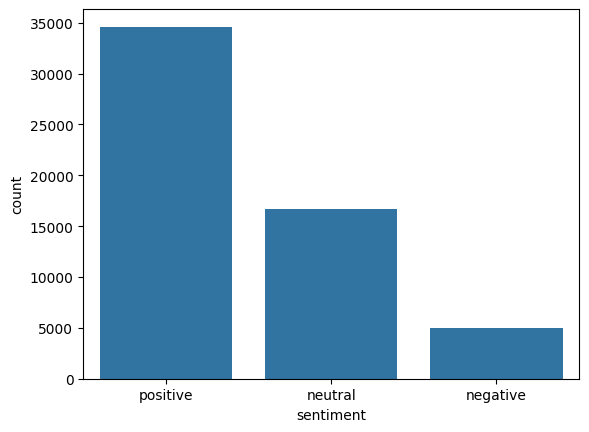

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="sentiment")

In [162]:
df['sentiment'].value_counts()

sentiment
positive    34606
neutral     16637
negative     5012
Name: count, dtype: int64

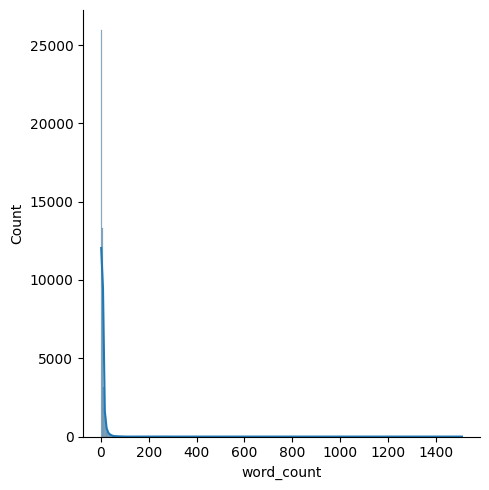

In [184]:
sns.displot(df['word_count'], kde=True)

In [163]:
# frequency distribution of sentiments

df['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
positive    61.52
neutral     29.57
negative     8.91
Name: proportion, dtype: float64

In [172]:
df['word_count']=df['text_clean'].apply(lambda x: len(x.split()))

In [173]:
df.sample(10)

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count
9050,GJZAcj4P99g,music,ട uper,0,2025-09-04T02:16:29Z,ട uper,neutral,0,2
2076,4wZwXhoxRIA,technology,"on the treadmill, hes watching: HOW TO TALK TO...",154,2025-01-04T20:18:02Z,"on the treadmill, hes watching: how to talk to...",neutral,0,14
32954,sUf2PtEZris,music,Mai Dekh rha hu 28 June 2025 ko,0,2025-06-28T08:29:44Z,mai dekh rha hu 28 june 2025 ko,neutral,0,8
20879,sUf2PtEZris,music,1 august ko kon kon dhek rha h,0,2025-07-28T16:13:40Z,1 august ko kon kon dhek rha h,neutral,0,8
35285,sUf2PtEZris,music,Ek number blast song 2025 👍👍🫶🫶🫶💥💥💥💝💝💝,3,2025-06-23T09:32:11Z,ek number blast song 2025 👍👍🫶🫶🫶💥💥💥💝💝💝,positive,1,6
22760,sUf2PtEZris,music,Ki naha,0,2025-07-22T16:00:39Z,ki naha,neutral,0,2
3771,qxRxcaPoYpQ,technology,Link dedo isse lene ke liye😅,3,2025-08-20T16:25:13Z,link dedo isse lene ke liye😅,positive,1,6
14280,sUf2PtEZris,music,Both camed in nanded city yesterday 24.08.2024...,0,2025-08-25T11:54:07Z,both camed in nanded city yesterday 24.08.2024...,positive,1,11
16363,sUf2PtEZris,music,🇮🇳🇮🇳🇮🇳🇮🇳,0,2025-08-14T18:59:55Z,🇮🇳🇮🇳🇮🇳🇮🇳,neutral,0,1
46321,sUf2PtEZris,music,It's all nice😊......ajun changli creativity za...,0,2025-06-01T12:57:35Z,it's all nice😊......ajun changli creativity za...,positive,1,7


In [ ]:
df.groupby('sentiment')['word_count'].mean()
# Negative comments: longest on average (people complain with 
# details).

# Neutral comments: medium length (e.g., “thanks for sharing 
# this”).

# Positive comments: shortest (e.g., “great!”, “
# awesome video”).

sentiment
negative    11.523144
neutral      6.065817
positive     7.494827
Name: word_count, dtype: float64

In [175]:
df['word_count'].describe()

count    56255.000000
mean         7.431108
std         17.711088
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max       1509.000000
Name: word_count, dtype: float64

In [ ]:
# Word frequency → shows most common terms used (good for making word clouds,
# stopwords analysis).

from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['text_clean'])

# Split into words and count
word_frequency = Counter(all_text.split())

# Convert into DataFrame
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_frequency_df.head(20))  # top 20 words


         word  frequency
15160    song       8056
9424      kon       7176
40        the       6545
8           i       4614
30         is       4565
24         to       4010
8814      hai       3978
14          a       3748
69       this       3602
125       and       3502
39        you       3085
8890       ko       2820
44     anyone       2695
27         in       2640
9323     dekh       2525
757         ❤       2493
85       like       2484
37         it       2443
8987     raha       2439
82         of       2420


<Axes: ylabel='word_count'>

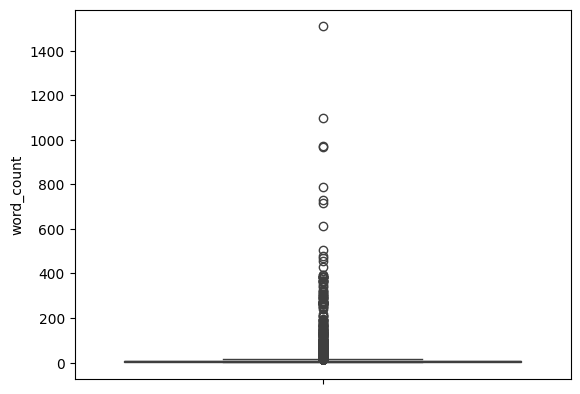

In [187]:
sns.boxplot(df['word_count'])

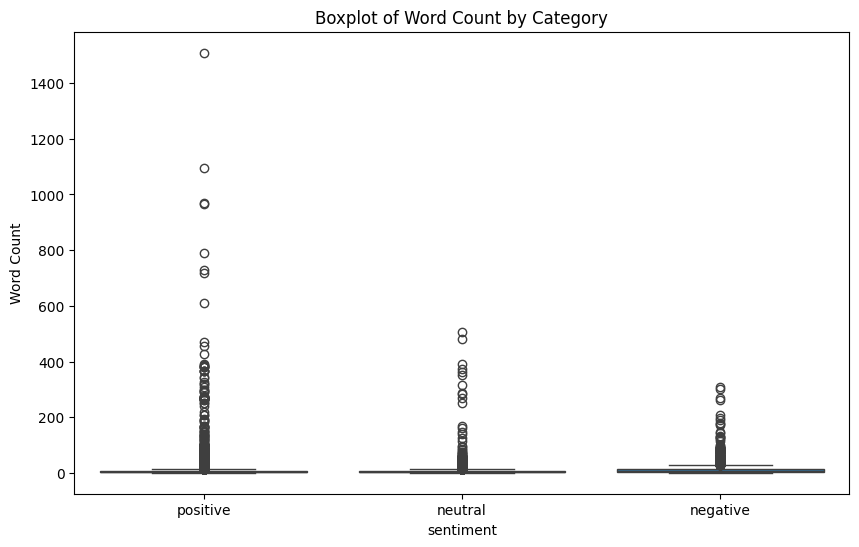

In [188]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('sentiment')
plt.ylabel('Word Count')
plt.show()

In [ ]:
# Positive comments

# Usually shortest (median close to the bottom).

# But many extreme outliers → people writing long positive
# reviews or spam (copy-paste promotions).

# Neutral comments

# Slightly longer on average than positive.

# Still has outliers, but fewer compared to positive.

# Negative comments

# Median is a bit higher (negative comments tend to be longer).

# Outliers are present, but fewer extreme case than positive

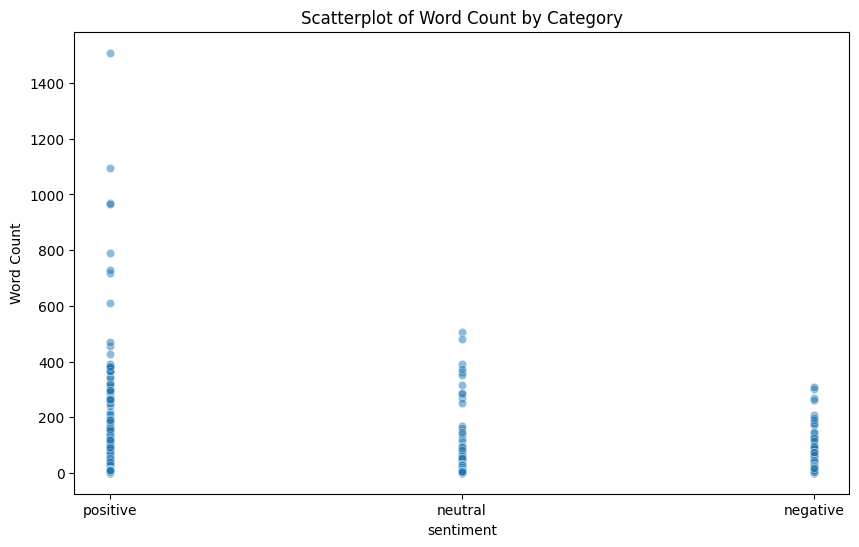

In [189]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('sentiment')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='sentiment', ylabel='word_count'>

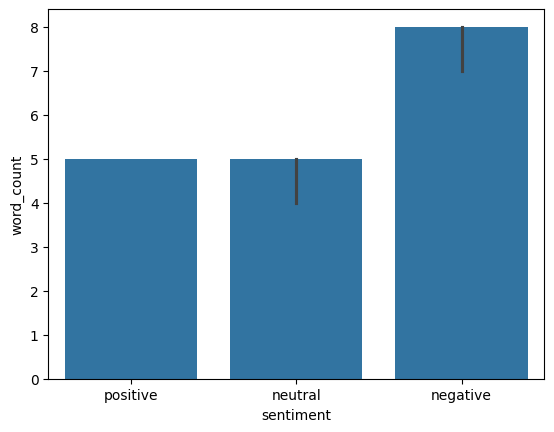

In [190]:
# median word counts among sentiments

sns.barplot(df,x='sentiment',y='word_count',estimator='median')

In [191]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [215]:
df = df[(df['word_count'] >= 2) & (df['word_count'] <= 100)]


In [216]:
df['word_count'].describe()

count    49533.000000
mean         7.595603
std          7.529844
min          2.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        100.000000
Name: word_count, dtype: float64

<Axes: ylabel='word_count'>

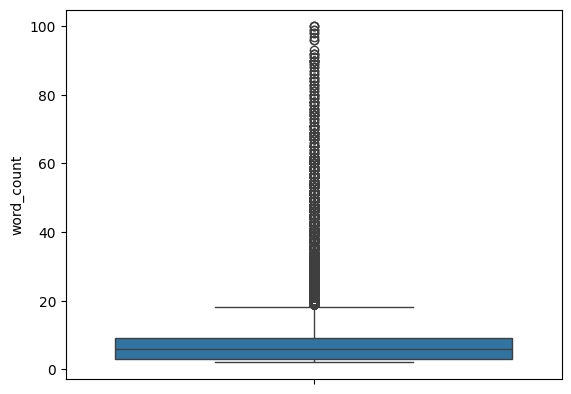

In [217]:
sns.boxplot(df['word_count'])

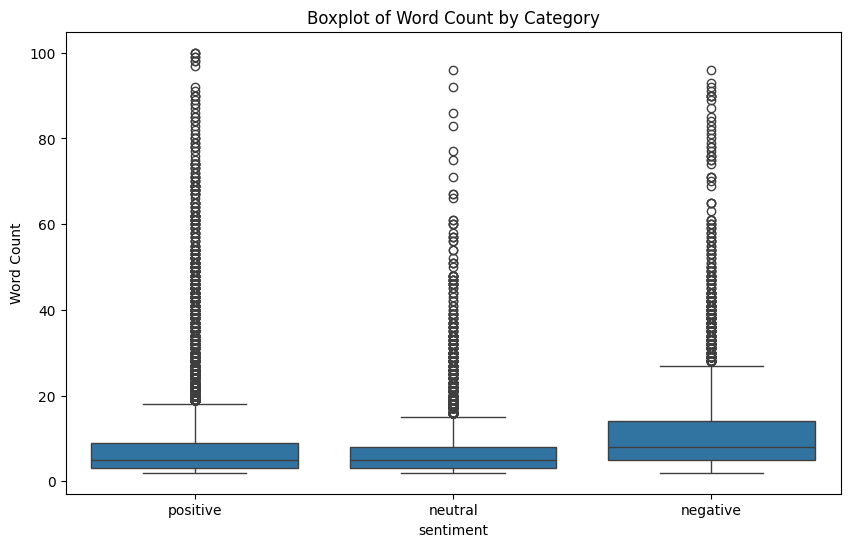

In [218]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('sentiment')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='sentiment', ylabel='word_count'>

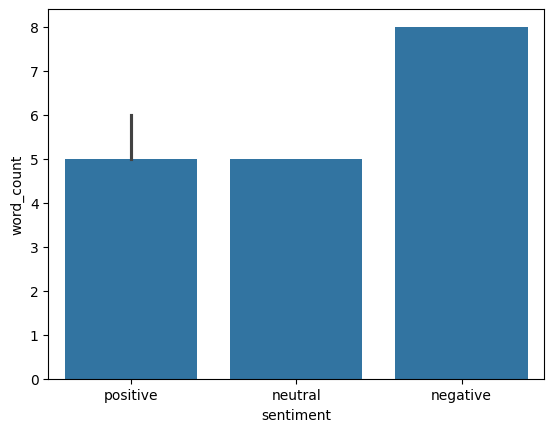

In [219]:
# median word counts among sentiments

sns.barplot(df,x='sentiment',y='word_count',estimator='median')

In [192]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['text_clean'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
df.sample(5)

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words
9747,GJZAcj4P99g,music,Paandi pattu...,6,2025-08-28T06:27:33Z,paandi pattu...,neutral,0,2,3,0
32168,sUf2PtEZris,music,Music and vibes ek no...,0,2025-06-29T17:14:54Z,music and vibes ek no...,neutral,0,5,3,1
34721,sUf2PtEZris,music,Saare insta se aa rahe hai 😅,0,2025-06-24T12:28:28Z,saare insta se aa rahe hai 😅,positive,1,7,0,0
23195,sUf2PtEZris,music,Where's T series 😂,0,2025-07-21T12:38:53Z,where's t series 😂,positive,1,4,1,1
1775,4wZwXhoxRIA,technology,Bro is living in 2100,0,2025-01-06T00:13:31Z,bro is living in 2100,neutral,0,5,0,2


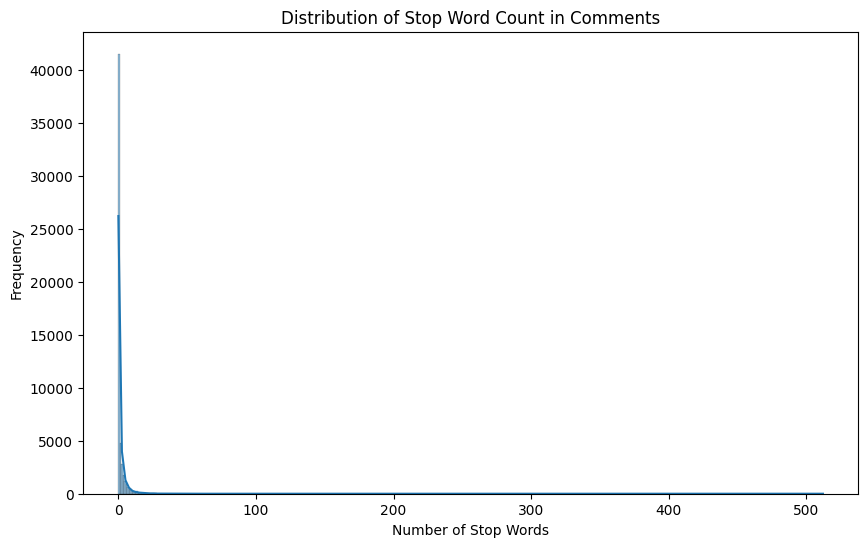

In [194]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\2961701577.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


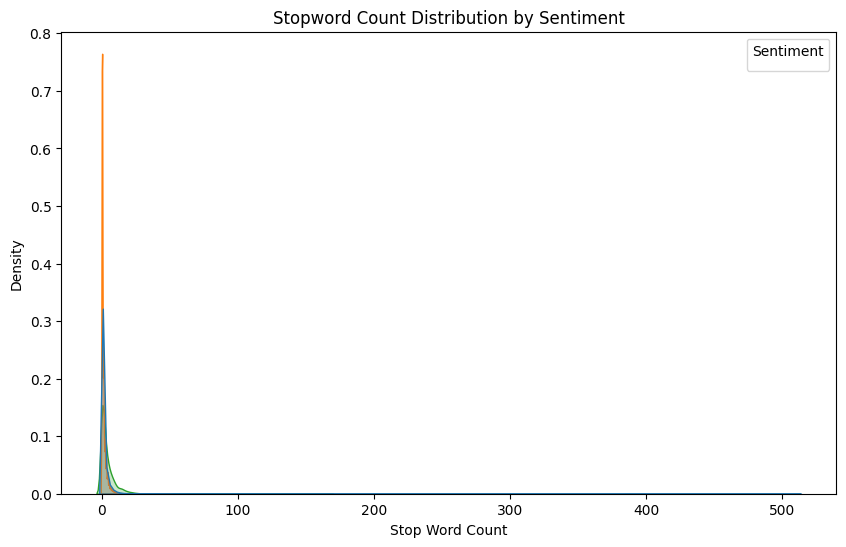

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric column
df['num_stop_words'] = pd.to_numeric(df['num_stop_words'], errors='coerce').fillna(0)

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='num_stop_words', hue='sentiment', common_norm=False, fill=True)
plt.title('Stopword Count Distribution by Sentiment')
plt.xlabel('Stop Word Count')
plt.ylabel('Density')
plt.legend(title='Sentiment')
plt.show()


<Axes: xlabel='sentiment', ylabel='num_stop_words'>

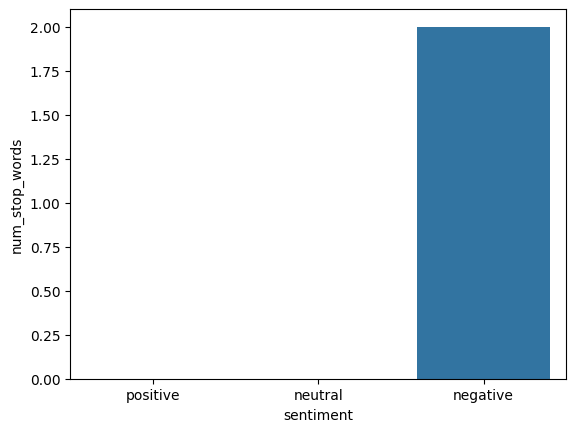

In [207]:
# median word counts among sentiments

sns.barplot(df,x='sentiment',y='num_stop_words',estimator='median')

In [209]:
df.groupby('sentiment')['num_stop_words'].median()

sentiment
negative    2.0
neutral     0.0
positive    0.0
Name: num_stop_words, dtype: float64

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\4228128161.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


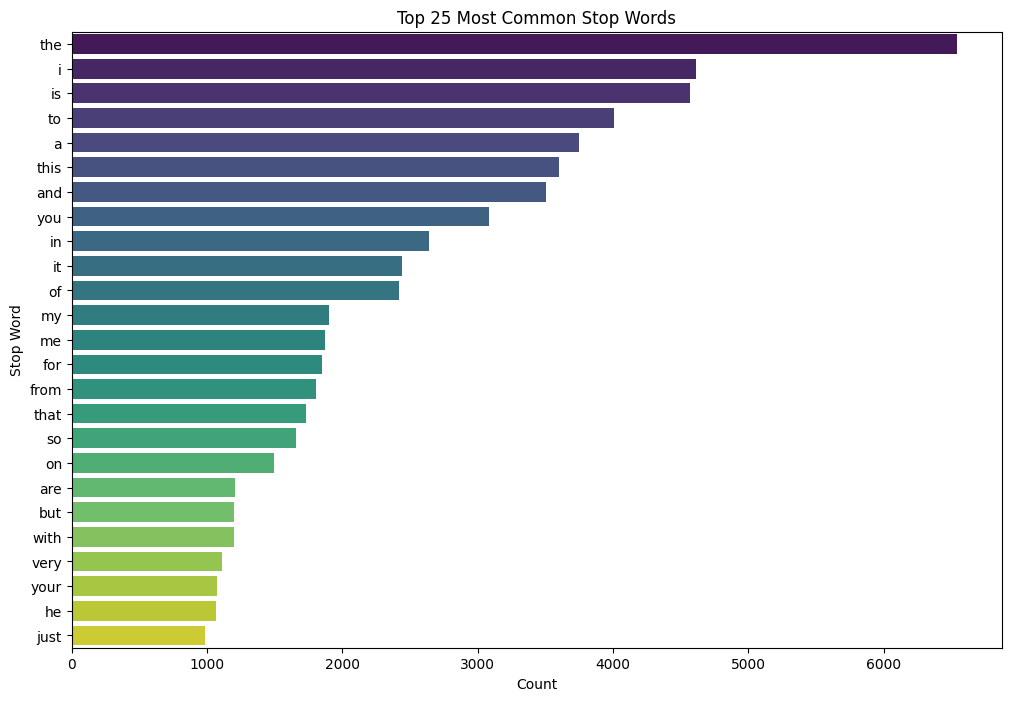

In [211]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['text_clean'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [212]:
df['num_chars'] = df['text_clean'].apply(len)

df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all products can be found on 🙌🏼 since i review...,positive,1,24,1,9,116
1,4wZwXhoxRIA,technology,😮😮,0,2025-09-11T09:52:55Z,😮😮,neutral,0,1,0,0,2
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro “how to talk to woman in 6 steps” is so re...,neutral,0,12,0,5,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i was gonna say does it give you the drinks fo...,positive,1,12,1,7,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what was o. his pc,neutral,0,9,1,3,40


In [213]:
df['num_chars'].describe()

count    56255.000000
mean        39.266056
std         98.179034
min          1.000000
25%         15.000000
50%         26.000000
75%         41.000000
max       7993.000000
Name: num_chars, dtype: float64

In [ ]:
# Character frequency → useful if you want to study emojis, 
# punctuation (!, ?, 😂) — which often carry strong emotional 
# signals.


from collections import Counter

all_text = ' '.join(df['text_clean'])

# Count characters
char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

print(char_frequency_df.head(20))  # top 20 characters


   character  frequency
2                418036
0          a     163479
13         e     141608
5          o     115609
11         n     111273
17         i     110144
9          t      98574
10         s      94317
24         h      88004
4          r      73679
1          l      56909
7          u      53620
67         ❤      48972
6          d      46810
30         k      44648
34         y      43406
33         g      42634
23         m      42291
8          c      29485
12         b      28583


In [179]:
char_frequency_df['character'].values

array([' ', 'a', 'e', ..., '🔘', '⏩', '🧛'], shape=(2310,), dtype=object)

In [180]:
char_frequency_df.tail(50)

,character,frequency
2235,🍲,1
2236,🎅,1
417,👜,1
510,🚕,1
385,͜,1
386,ʖ,1
2207,𝗳,1
2210,🟠,1
2211,🟡,1
2222,🕔,1


In [181]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['text_clean'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars
31736,sUf2PtEZris,music,Instagram me itna baar ye song sun liya hun ki...,0,2025-06-30T15:05:58Z,instagram me itna baar ye song sun liya hun ki...,neutral,0,47,8
10535,GJZAcj4P99g,music,Fejo thukki❤,5,2025-08-03T07:57:00Z,fejo thukki❤,positive,1,2,0
25497,sUf2PtEZris,music,❤❤❤❤❤😮😮😮🎉🎉🎉😊😊😊😮🍫🍫💝💖❤️💙🧡,0,2025-07-16T07:43:09Z,❤❤❤❤❤😮😮😮🎉🎉🎉😊😊😊😮🍫🍫💝💖❤️💙🧡,positive,1,1,0
38860,sUf2PtEZris,music,Love from Korea🇰🇷,0,2025-06-17T00:56:17Z,love from korea🇰🇷,positive,1,3,0
4393,xJM7mlVqTr8,movies,The thumbnail and start 💀,0,2025-09-11T17:33:43Z,the thumbnail and start 💀,neutral,0,5,0


In [182]:
df['num_punctuation_chars'].describe()

count    56255.000000
mean         0.734033
std          3.375301
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        317.000000
Name: num_punctuation_chars, dtype: float64

In [183]:
df.groupby('sentiment')['num_punctuation_chars'].mean()


sentiment
negative    1.172187
neutral     0.697001
positive    0.688378
Name: num_punctuation_chars, dtype: float64

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\1499716229.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


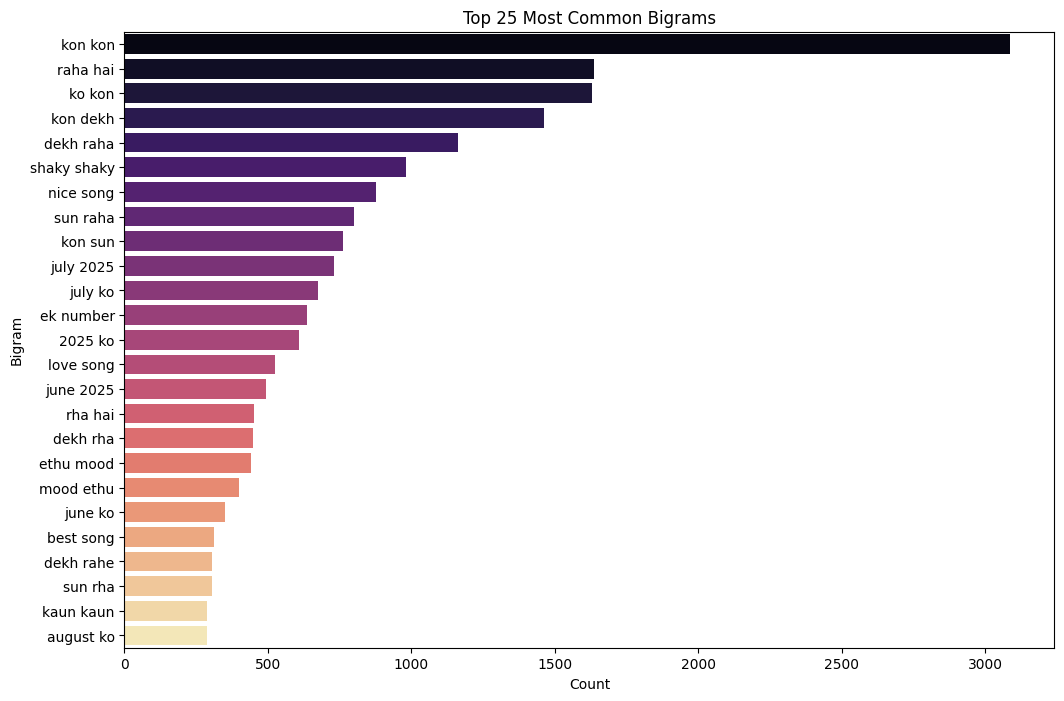

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['text_clean'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\3811209560.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


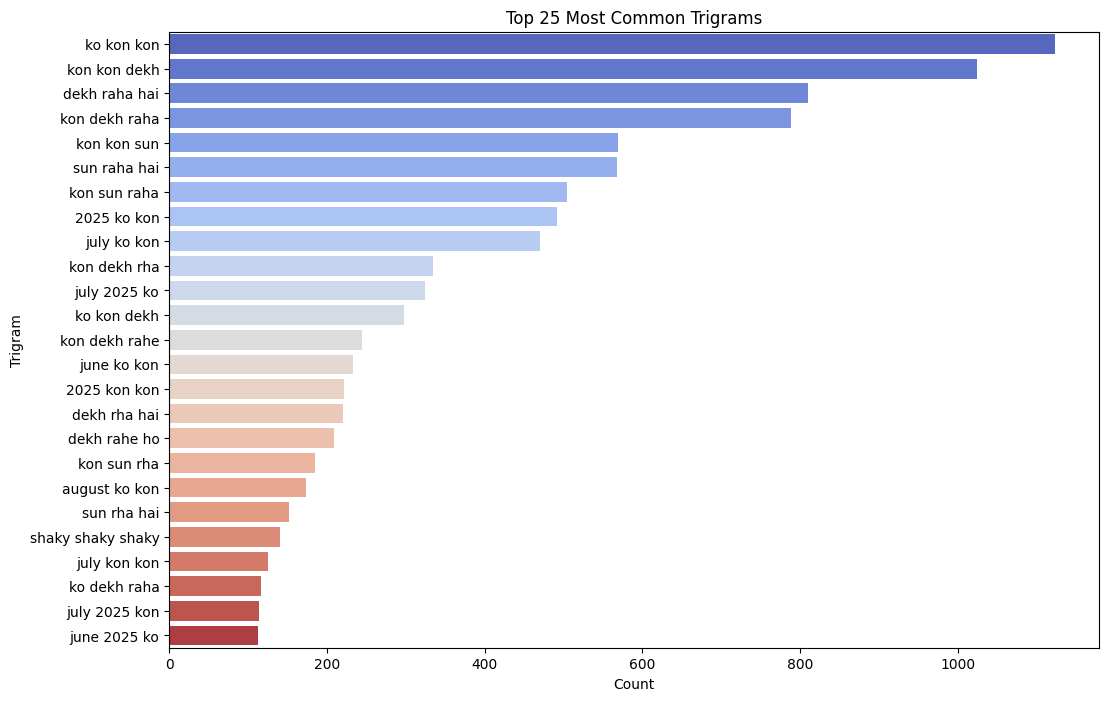

In [220]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['text_clean'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [221]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\938117022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [222]:
all_text = ' '.join(df['text_clean'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
2,,376232
0,a,146190
13,e,128673
5,o,105561
11,n,103371
15,i,99784
9,t,88603
10,s,87244
21,h,79554
4,r,66203


In [223]:
df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all products can be found on since i review 5...,positive,1,24,1,9,116
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro how to talk to woman in 6 steps is so rela...,neutral,0,12,0,5,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i was gonna say does it give you the drinks fo...,positive,1,12,1,7,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what was o. his pc,neutral,0,9,1,3,40
5,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,how is everyone not talking about his search?!...,positive,1,15,4,6,85


In [224]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['text_clean'] = df['text_clean'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\260806407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df['text_clean'].apply(


In [225]:
df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,products found since review 50 products per mo...,positive,1,24,1,9,116
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro talk woman 6 steps relatable,neutral,0,12,0,5,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,gonna say give drinks free?,positive,1,12,1,7,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt o. pc,neutral,0,9,1,3,40
5,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,everyone not talking search?!how tell ur girlf...,positive,1,15,4,6,85


In [227]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['text_clean'] = df['text_clean'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,product found since review 50 product per mont...,positive,1,24,1,9,116
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro talk woman 6 step relatable,neutral,0,12,0,5,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,gonna say give drink free?,positive,1,12,1,7,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt o. pc,neutral,0,9,1,3,40
5,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,everyone not talking search?!how tell ur girlf...,positive,1,15,4,6,85


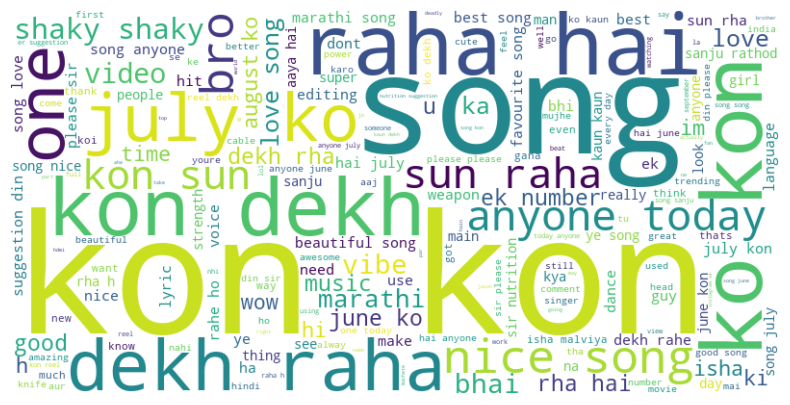

In [230]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['text_clean'])

In [229]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


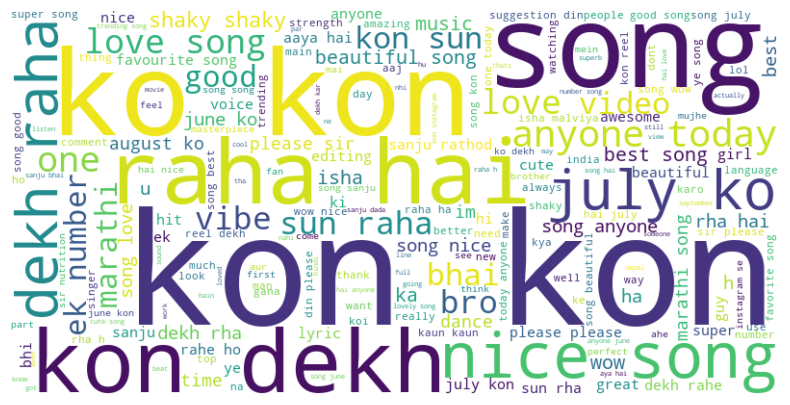

In [235]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment_numeric'] == 1]['text_clean'])

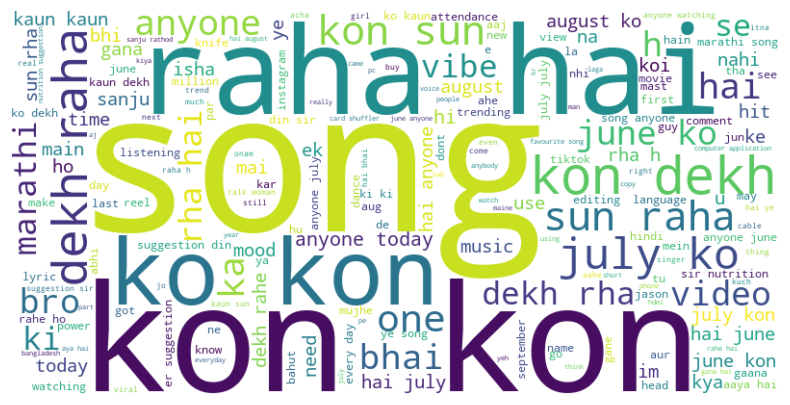

In [236]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment_numeric'] == 0]['text_clean'])

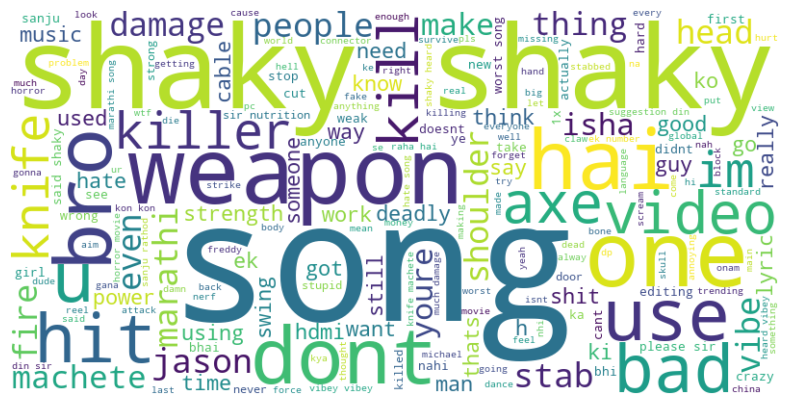

In [237]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['sentiment_numeric'] == -1]['text_clean'])

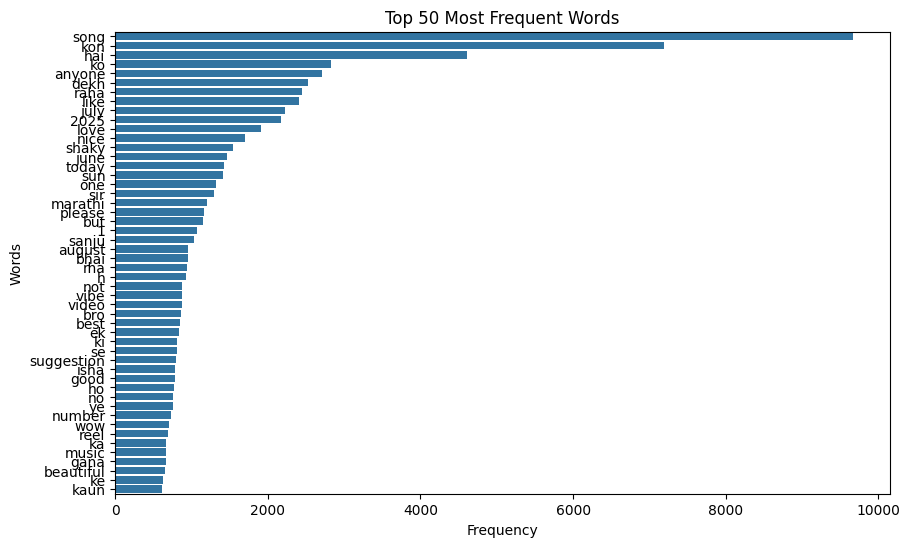

In [238]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['text_clean']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


In [239]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['text_clean'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)


KeyError: 'technology'

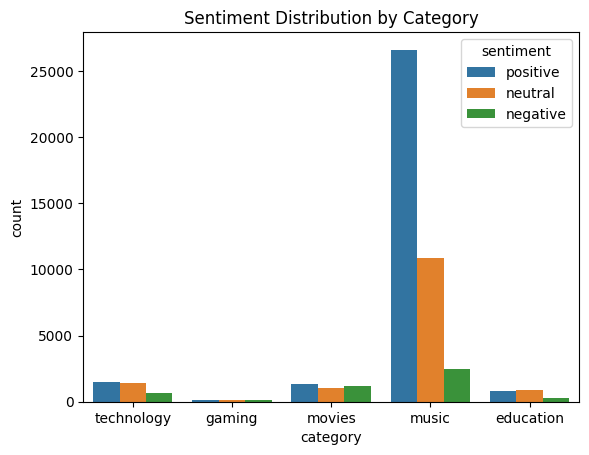

In [241]:
sns.countplot(data=df, x='category', hue='sentiment')
plt.title("Sentiment Distribution by Category")
plt.show()


In [246]:
from sklearn.preprocessing import OneHotEncoder

# ✅ Handle both sklearn versions
try:
    ohe = OneHotEncoder(sparse_output=False, drop="first")  # new versions
except TypeError:
    ohe = OneHotEncoder(sparse=False, drop="first")  # older versions

category_encoded = ohe.fit_transform(df[['category']])

# Convert back to DataFrame with category names
category_df = pd.DataFrame(category_encoded, columns=ohe.get_feature_names_out(['category']))

# Merge into original DataFrame
df = pd.concat([df.reset_index(drop=True), category_df.reset_index(drop=True)], axis=1)

df.head()


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars,category_gaming,category_movies,category_music,category_technology
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,product found since review 50 product per mont...,positive,1,24,1,9,116,0.0,0.0,0.0,1.0
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro talk woman 6 step relatable,neutral,0,12,0,5,53,0.0,0.0,0.0,1.0
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,gonna say give drink free?,positive,1,12,1,7,54,0.0,0.0,0.0,1.0
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt o. pc,neutral,0,9,1,3,40,0.0,0.0,0.0,1.0
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,everyone not talking search?!how tell ur girlf...,positive,1,15,4,6,85,0.0,0.0,0.0,1.0


In [251]:
df.sample()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars,category_gaming,category_movies,category_music,category_technology
42090,sUf2PtEZris,music,Love it from Assam,1,2025-05-25T04:34:12Z,love assam,positive,1,4,0,2,18,0.0,0.0,1.0,0.0


In [252]:
df.columns

Index(['video_id', 'category', 'text', 'likes', 'published_at', 'text_clean',
       'sentiment', 'sentiment_numeric', 'word_count', 'num_punctuation_chars',
       'num_stop_words', 'num_chars', 'category_gaming', 'category_movies',
       'category_music', 'category_technology'],
      dtype='object')

In [253]:
#  Add VADER Sentiment Scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df[['sent_neg', 'sent_neu', 'sent_pos', 'sent_compound']] = df['text_clean'].apply(
    lambda x: pd.Series(sia.polarity_scores(x))
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...


In [254]:
df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars,category_gaming,category_movies,category_music,category_technology,sent_neg,sent_neu,sent_pos,sent_compound
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,product found since review 50 product per mont...,positive,1,24,1,9,116,0.0,0.0,0.0,1.0,0.0,1.000,0.000,0.0000
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro talk woman 6 step relatable,neutral,0,12,0,5,53,0.0,0.0,0.0,1.0,0.0,1.000,0.000,0.0000
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,gonna say give drink free?,positive,1,12,1,7,54,0.0,0.0,0.0,1.0,0.0,0.548,0.452,0.5106
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt o. pc,neutral,0,9,1,3,40,0.0,0.0,0.0,1.0,0.0,1.000,0.000,0.0000
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,everyone not talking search?!how tell ur girlf...,positive,1,15,4,6,85,0.0,0.0,0.0,1.0,0.0,0.640,0.360,0.6696


In [255]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['hour'] = df['published_at'].dt.hour
df['weekday'] = df['published_at'].dt.weekday
df['month'] = df['published_at'].dt.month


In [256]:
df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,...,category_movies,category_music,category_technology,sent_neg,sent_neu,sent_pos,sent_compound,hour,weekday,month
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04 19:28:08+00:00,product found since review 50 product per mont...,positive,1,24,1,...,0.0,0.0,1.0,0.0,1.000,0.000,0.0000,19,5,1
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10 23:44:24+00:00,bro talk woman 6 step relatable,neutral,0,12,0,...,0.0,0.0,1.0,0.0,1.000,0.000,0.0000,23,2,9
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09 16:25:03+00:00,gonna say give drink free?,positive,1,12,1,...,0.0,0.0,1.0,0.0,0.548,0.452,0.5106,16,1,9
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08 22:33:58+00:00,anyone gonna talk abt o. pc,neutral,0,9,1,...,0.0,0.0,1.0,0.0,1.000,0.000,0.0000,22,0,9
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08 12:17:37+00:00,everyone not talking search?!how tell ur girlf...,positive,1,15,4,...,0.0,0.0,1.0,0.0,0.640,0.360,0.6696,12,0,9


In [257]:
#  → Add Emotion Features (NRCLex)

!pip install nrclex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.2 MB/s eta 0:00:00
  Created wheel for nrclex: filename=nrclex-3.0.0-py3-none-any.whl size=43428 sha256=fe83d1134ad9ca5aba02e55348890a08e9c7142d2aaf3559c91b55c3bf2706ff
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\b3\d1\49\335aaaa1ff35c55abbe956116d8b3cc119d71e04ec491c25f9
Successfully buil


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [259]:
from nrclex import NRCLex

def get_dominant_emotion(text):
    emotions = NRCLex(text).top_emotions
    return emotions[0][0] if emotions else "neutral"

df['dominant_emotion'] = df['text_clean'].apply(get_dominant_emotion)


In [260]:
df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,...,category_music,category_technology,sent_neg,sent_neu,sent_pos,sent_compound,hour,weekday,month,dominant_emotion
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04 19:28:08+00:00,product found since review 50 product per mont...,positive,1,24,1,...,0.0,1.0,0.0,1.000,0.000,0.0000,19,5,1,trust
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10 23:44:24+00:00,bro talk woman 6 step relatable,neutral,0,12,0,...,0.0,1.0,0.0,1.000,0.000,0.0000,23,2,9,positive
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09 16:25:03+00:00,gonna say give drink free?,positive,1,12,1,...,0.0,1.0,0.0,0.548,0.452,0.5106,16,1,9,fear
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08 22:33:58+00:00,anyone gonna talk abt o. pc,neutral,0,9,1,...,0.0,1.0,0.0,1.000,0.000,0.0000,22,0,9,positive
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08 12:17:37+00:00,everyone not talking search?!how tell ur girlf...,positive,1,15,4,...,0.0,1.0,0.0,0.640,0.360,0.6696,12,0,9,positive


In [261]:
from nrclex import NRCLex
import pandas as pd

def get_emotion_scores(text):
    """
    Returns a dictionary of emotion probabilities for the text
    Example: {"anger": 0.1, "joy": 0.3, ...}
    """
    emotions = NRCLex(text)
    raw_scores = emotions.raw_emotion_scores  # counts of emotion words
    total = sum(raw_scores.values())
    
    if total == 0:  # no emotions found
        return {emotion: 0 for emotion in [
            'fear', 'anger', 'anticipation', 'trust', 
            'surprise', 'positive', 'negative', 
            'sadness', 'disgust', 'joy'
        ]}
    
    # Normalize counts into probabilities
    probs = {emotion: count/total for emotion, count in raw_scores.items()}
    
    # Ensure all emotions appear (fill missing with 0)
    all_emotions = {
        'fear': 0, 'anger': 0, 'anticipation': 0, 'trust': 0, 
        'surprise': 0, 'positive': 0, 'negative': 0, 
        'sadness': 0, 'disgust': 0, 'joy': 0
    }
    all_emotions.update(probs)
    
    return all_emotions


In [263]:
# Apply to your text column
emotion_features = df['text_clean'].apply(get_emotion_scores)

# Convert list of dicts into DataFrame
emotion_df = pd.DataFrame(list(emotion_features))

# Merge with original dataframe
df = pd.concat([df, emotion_df], axis=1)

df.head()


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,...,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04 19:28:08+00:00,product found since review 50 product per mont...,positive,1,24,1,...,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10 23:44:24+00:00,bro talk woman 6 step relatable,neutral,0,12,0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09 16:25:03+00:00,gonna say give drink free?,positive,1,12,1,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08 22:33:58+00:00,anyone gonna talk abt o. pc,neutral,0,9,1,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08 12:17:37+00:00,everyone not talking search?!how tell ur girlf...,positive,1,15,4,...,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000


C:\Users\vaibh\AppData\Local\Temp\ipykernel_8740\3643104667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="viridis")


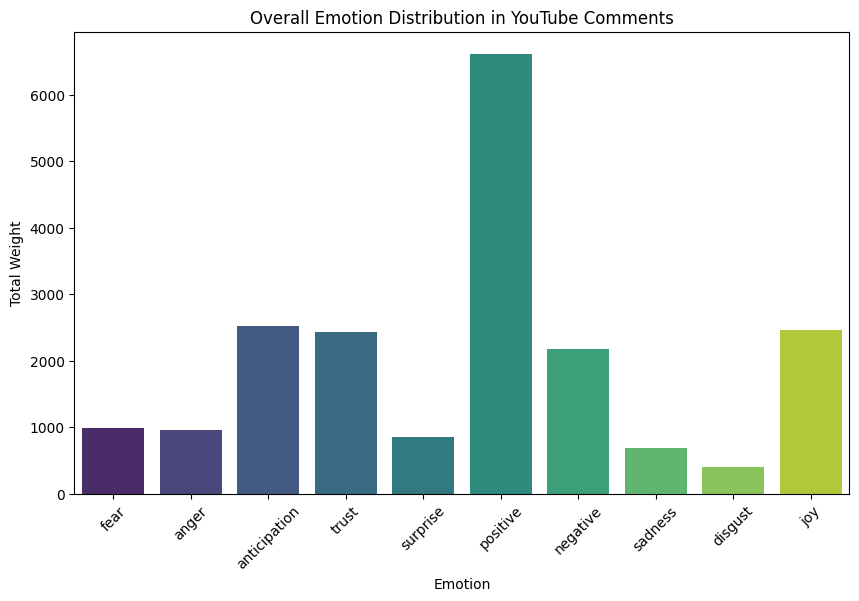

In [264]:
# Sum each emotion column across all comments
emotion_totals = df[['fear','anger','anticipation','trust','surprise',
                     'positive','negative','sadness','disgust','joy']].sum()

# Plot as bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=emotion_totals.index, y=emotion_totals.values, palette="viridis")
plt.title("Overall Emotion Distribution in YouTube Comments")
plt.ylabel("Total Weight")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.show()


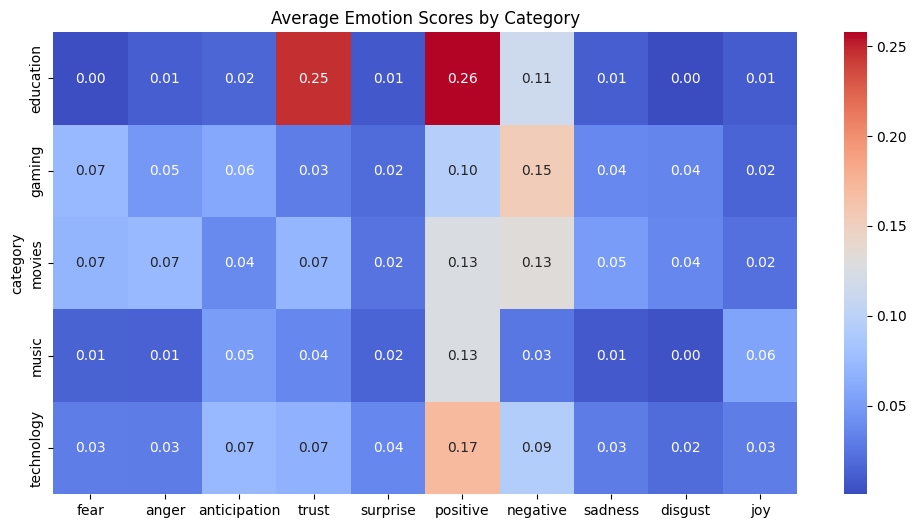

In [265]:
# Group by category and take mean emotion scores
category_emotions = df.groupby("category")[['fear','anger','anticipation',
                                            'trust','surprise','positive',
                                            'negative','sadness','disgust','joy']].mean()

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(category_emotions, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Emotion Scores by Category")
plt.show()


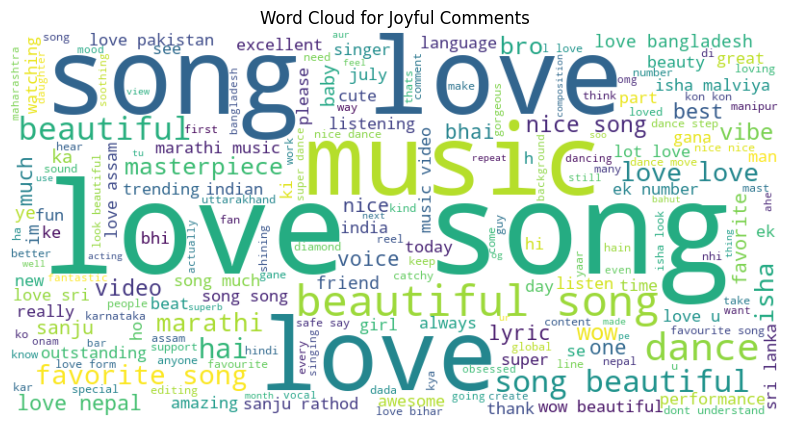

In [ ]:
#  Emotion word cloud 

from wordcloud import WordCloud

# Create a combined text for joy-related comments
joy_text = " ".join(df.loc[df['joy'] > 0.3, 'text_clean'])

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(joy_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Joyful Comments")
plt.show()


#  This shows what words people use when expressing a certain emotion.

In [243]:
df.groupby('category')['sentiment'].count()

category
education      2009
gaming          426
movies         3628
music         39915
technology     3555
Name: sentiment, dtype: int64

In [267]:
# Make a deep copy of your cleaned dataframe
df_model = df.copy()

# Check the shape and columns
print(df_model.shape)
print(df_model.columns)


(49533, 34)
Index(['video_id', 'category', 'text', 'likes', 'published_at', 'text_clean',
       'sentiment', 'sentiment_numeric', 'word_count', 'num_punctuation_chars',
       'num_stop_words', 'num_chars', 'category_gaming', 'category_movies',
       'category_music', 'category_technology', 'sent_neg', 'sent_neu',
       'sent_pos', 'sent_compound', 'hour', 'weekday', 'month',
       'dominant_emotion', 'fear', 'anger', 'anticipation', 'trust',
       'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'],
      dtype='object')


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_punctuation_chars,...,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04 19:28:08+00:00,product found since review 50 product per mont...,positive,1,24,1,...,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10 23:44:24+00:00,bro talk woman 6 step relatable,neutral,0,12,0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09 16:25:03+00:00,gonna say give drink free?,positive,1,12,1,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08 22:33:58+00:00,anyone gonna talk abt o. pc,neutral,0,9,1,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08 12:17:37+00:00,everyone not talking search?!how tell ur girlf...,positive,1,15,4,...,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000


In [269]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49533 entries, 0 to 49532
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   video_id               49533 non-null  object             
 1   category               49533 non-null  object             
 2   text                   49533 non-null  object             
 3   likes                  49533 non-null  int64              
 4   published_at           49533 non-null  datetime64[ns, UTC]
 5   text_clean             49533 non-null  object             
 6   sentiment              49533 non-null  object             
 7   sentiment_numeric      49533 non-null  int64              
 8   word_count             49533 non-null  int64              
 9   num_punctuation_chars  49533 non-null  int64              
 10  num_stop_words         49533 non-null  int64              
 11  num_chars              49533 non-null  int64          

In [313]:
# Features
X = df_model.drop(columns=[
    'video_id', 'category', 'text', 'text_clean',
    'published_at', 'sentiment', 'dominant_emotion','sentiment_numeric'
])

# Target
y = df_model['sentiment_numeric']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)
print("✅ Unique target values:", y.unique())


✅ Features shape: (49533, 26)
✅ Target shape: (49533,)
✅ Unique target values: [ 1  0 -1]


In [321]:
# Drop non-numeric columns
X = df.drop(columns=['video_id','category','text','text_clean','sentiment','dominant_emotion','published_at'])
y = df['sentiment_numeric']


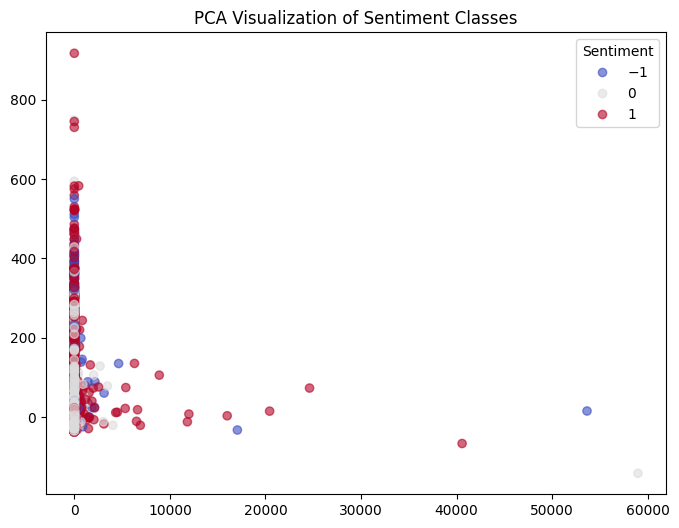

In [322]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Sentiment")
plt.title("PCA Visualization of Sentiment Classes")
plt.show()


In [323]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


[0.99134434 0.00840543]
0.9997497733601155


[0.9913, 0.0084] → PC1 explains ~99.1% of the variance, PC2 explains ~0.8%.

Total variance = ~99.97%, which means:

Almost all information is concentrated in one dimension (PC1).

PC2 (and others) barely contribute → dataset is highly skewed / dominated by

In [324]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [314]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.74      0.59      0.66       938
           0       0.61      0.53      0.57      2875
           1       0.76      0.83      0.79      6094

    accuracy                           0.72      9907
   macro avg       0.70      0.65      0.67      9907
weighted avg       0.71      0.72      0.71      9907

[[ 558   93  287]
 [  39 1520 1316]
 [ 156  884 5054]]


In [330]:
X.columns

Index(['likes', 'sentiment_numeric', 'word_count', 'num_punctuation_chars',
       'num_stop_words', 'num_chars', 'category_gaming', 'category_movies',
       'category_music', 'category_technology', 'sent_neg', 'sent_neu',
       'sent_pos', 'sent_compound', 'hour', 'weekday', 'month', 'fear',
       'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative',
       'sadness', 'disgust', 'joy'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train with class weights
clf = LogisticRegression(max_iter=5000,class_weight="balanced")
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.17      0.54      0.26       938
           0       0.33      0.65      0.44      2875
           1       0.71      0.16      0.25      6094

    accuracy                           0.33      9907
   macro avg       0.40      0.45      0.32      9907
weighted avg       0.55      0.33      0.31      9907

[[ 502  378   58]
 [ 677 1866  332]
 [1779 3368  947]]


e:\influence-mirror\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [329]:
import pandas as pd
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.sort_values(ascending=False).head(10))


ValueError: Length of values (26) does not match length of index (27)

In [310]:
X

,likes,sentiment_numeric,word_count,num_punctuation_chars,num_stop_words,num_chars,category_gaming,category_movies,category_music,category_technology,...,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,1978,1,24,1,9,116,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.333333
1,0,0,12,0,5,53,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
2,0,1,12,1,7,54,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0,0,9,1,3,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.000000
4,0,1,15,4,6,85,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49528,27,0,6,0,0,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
49529,4,0,7,1,0,34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
49530,39,0,8,0,0,45,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
49531,4,0,7,0,1,38,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [301]:
y

0        1
1        0
2        1
3        0
4        1
        ..
49528    0
49529    0
49530    0
49531    0
49532    0
Name: sentiment_numeric, Length: 49533, dtype: int64

In [304]:
X.columns

Index(['video_id', 'category', 'text', 'likes', 'published_at', 'text_clean',
       'word_count', 'num_punctuation_chars', 'num_stop_words', 'num_chars',
       'category_gaming', 'category_movies', 'category_music',
       'category_technology', 'sent_neg', 'sent_neu', 'sent_pos',
       'sent_compound', 'hour', 'weekday', 'month', 'dominant_emotion', 'fear',
       'anger', 'anticipation', 'trust', 'surprise', 'positive', 'negative',
       'sadness', 'disgust', 'joy'],
      dtype='object')

In [311]:
X = df.drop(columns=['sentiment_numeric', 'sentiment'])  # drop both
y = df['sentiment_numeric']  # only keep as target


In [ ]:
# Apply TF-IDF on text_clean
# max_features=2000 → keep top 2000 most important words/phrases.

# ngram_range=(1,2) → includes unigrams (“good”) and bigrams (“not good”).

In [334]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer (limit to 2000 features to avoid huge dimensionality)
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words="english")

X_tfidf = tfidf.fit_transform(df['text_clean'])


In [335]:
import numpy as np
import scipy.sparse as sp

# Keep only numeric features
X_numeric = df.drop(columns=['video_id','category','text','text_clean',
                             'sentiment','dominant_emotion','published_at','sentiment_numeric'])

# Convert to sparse matrix
X_numeric_sparse = sp.csr_matrix(X_numeric.values)

# Combine TF-IDF + Numeric features
X_final = sp.hstack([X_tfidf, X_numeric_sparse])

y = df['sentiment_numeric']


In [336]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.76      0.62      0.68       938
           0       0.64      0.54      0.58      2875
           1       0.77      0.85      0.81      6094

    accuracy                           0.74      9907
   macro avg       0.72      0.67      0.69      9907
weighted avg       0.73      0.74      0.73      9907



In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X_tfidf = your TF-IDF features
# y = target (sentiment_numeric)

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Logistic Regression
clf = LogisticRegression(
    max_iter=5000,    # give enough iterations
    solver='saga',    # works well for sparse TF-IDF
    class_weight="balanced"  # handle imbalance
)
clf.fit(X_train, y_train)

# 3. Predictions
y_pred = clf.predict(X_test)

# 4. Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


e:\influence-mirror\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.17      0.54      0.26       938
           0       0.33      0.65      0.44      2875
           1       0.71      0.15      0.25      6094

    accuracy                           0.33      9907
   macro avg       0.40      0.45      0.32      9907
weighted avg       0.55      0.33      0.31      9907

[[ 504  377   57]
 [ 680 1863  332]
 [1791 3361  942]]


In [341]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# y = df['sentiment_numeric']   # -1, 0, 1

# Map labels for XGBoost (-1→0, 0→1, 1→2)
y_mapped = y.replace({-1: 0, 0: 1, 1: 2})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped
)

# XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Map back predictions to original labels
y_pred_original = pd.Series(y_pred).replace({0: -1, 1: 0, 2: 1})
y_test_original = y_test.replace({0: -1, 1: 0, 2: 1})

# Evaluate
print(classification_report(y_test_original, y_pred_original))
print(confusion_matrix(y_test_original, y_pred_original))


e:\influence-mirror\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

          -1       0.77      0.61      0.68       938
           0       0.66      0.55      0.60      2875
           1       0.77      0.86      0.81      6094

    accuracy                           0.74      9907
   macro avg       0.73      0.67      0.70      9907
weighted avg       0.74      0.74      0.74      9907

[[ 574   88  276]
 [  28 1568 1279]
 [ 146  736 5212]]
